# G21.5-0.9 NuSTAR data reanlysis using WILM abundances.
The data is fit for two different absorption models, phabs and tbabs as these two are commonly used. <br>
Notes on some of the code can be found at bottom of this notebook,<br><br><br>
*(Samayra Straal Jan 2019)*

In [1]:
%matplotlib inline
from matplotlib import pylab as plt
import numpy as np
import matplotlib as mpl

# Scipy imports:
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy import optimize
import scipy.integrate as integrate
from scipy.integrate import simps
import scipy.interpolate 
import scipy.optimize

import pandas as pd

import seaborn as sns
# These defaults are the ones I like, but feel free to adapt or delete them
sns.set_style('white')
sns.set_context('talk')
#mpl.rcParams['figure.figsize'] = (10,5)

## Read in data from .csv file

In [8]:
df = pd.read_csv('data/nustar_fit_params.csv', delimiter=';')#,index_col='Obs_ID')  # Pandas Magic
df['Obs']=df['Obs'].astype(str) # Set Obs to string, otherwise in plot it will sort on number

# Results for fitting phabs * pow, using WILM abundances (n_H = 2.99)

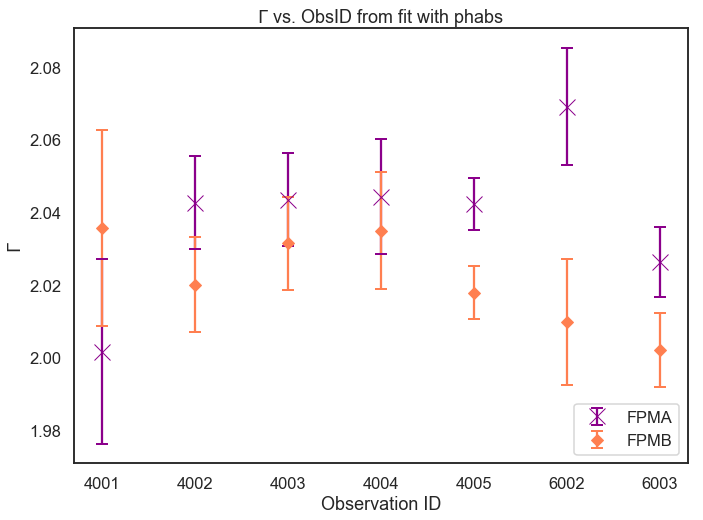

In [38]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

yerrs0=np.abs(df[['err_min_phoindex_phabs', 'err_plus_phoindex_phabs']][::2].T.values)
yerrs1=np.abs(df[['err_min_phoindex_phabs', 'err_plus_phoindex_phabs']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['phoindex_phabs'][::2], yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['phoindex_phabs'][1::2], yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

plt.xlabel('Observation ID')
plt.ylabel(r'$\Gamma$')
plt.title(r'$\Gamma$ vs. ObsID from fit with phabs')

plt.legend(loc=4)
plt.show()



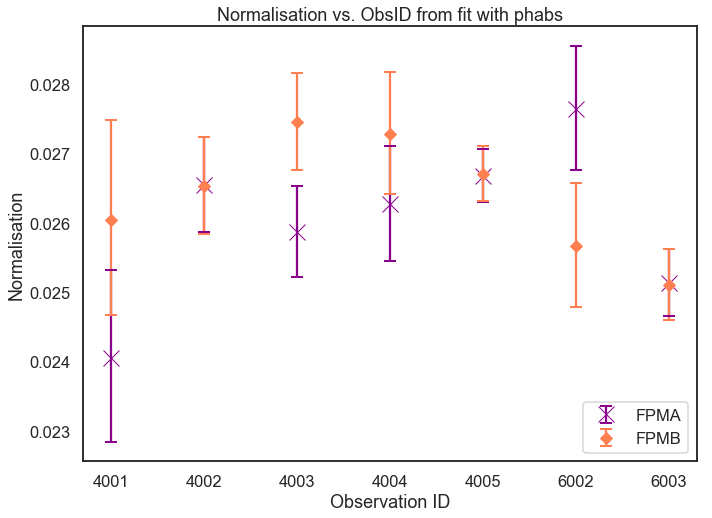

In [39]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

yerrs0=np.abs(df[['err_min_norm_phabs', 'err_plus_norm_phabs']][::2].T.values)
yerrs1=np.abs(df[['err_min_norm_phabs', 'err_plus_norm_phabs']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['norm_phabs'][::2], yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['norm_phabs'][1::2], yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

plt.xlabel('Observation ID')
plt.ylabel('Normalisation')
plt.title('Normalisation vs. ObsID from fit with phabs')

plt.legend(loc=4)
plt.show()

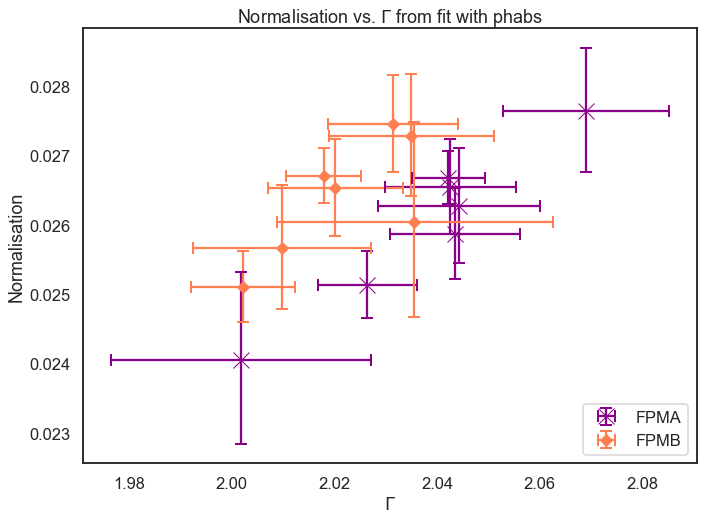

In [40]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

xerrs0=np.abs(df[['err_min_phoindex_phabs', 'err_plus_phoindex_phabs']][::2].T.values)
xerrs1=np.abs(df[['err_min_phoindex_phabs', 'err_plus_phoindex_phabs']][1::2].T.values)

yerrs0=np.abs(df[['err_min_norm_phabs', 'err_plus_norm_phabs']][::2].T.values)
yerrs1=np.abs(df[['err_min_norm_phabs', 'err_plus_norm_phabs']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['phoindex_phabs'][::2], df['norm_phabs'][::2], xerr=xerrs0, yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['phoindex_phabs'][1::2], df['norm_phabs'][1::2], xerr=xerrs1, yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

plt.ylabel('Normalisation')
plt.xlabel(r'$\Gamma$')
plt.title(r'Normalisation vs. $\Gamma$ from fit with phabs')

plt.legend(loc=4)
plt.show()

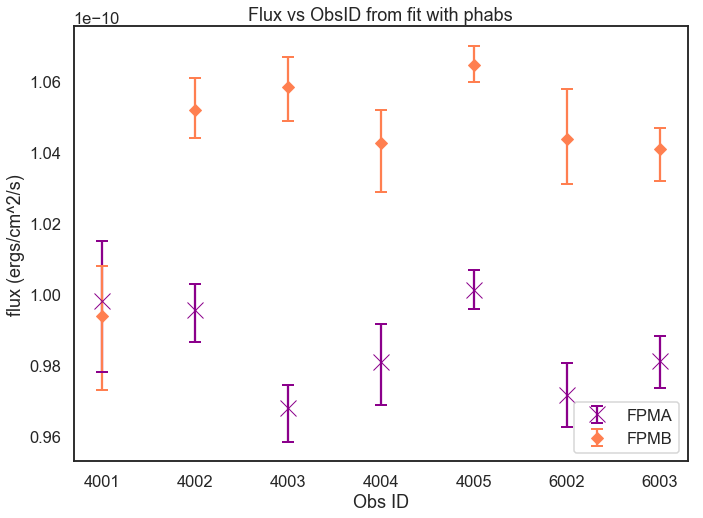

In [47]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

df['err_min_flux_phabs']=df['flux_phabs']-df['flux_min_phabs']
df['err_plus_flux_phabs']=df['flux_max_phabs']-df['flux_phabs']
yerrs0=np.abs(df[['err_min_flux_phabs', 'err_plus_flux_phabs']][::2].T.values)
yerrs1=np.abs(df[['err_min_flux_phabs', 'err_plus_flux_phabs']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['flux_phabs'][::2], yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['flux_phabs'][1::2], yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

plt.ylabel('flux (ergs/cm^2/s)')
plt.xlabel('Obs ID')
plt.title('Flux vs ObsID from fit with phabs')

plt.legend(loc=4)
plt.show()

# Results for fitting tbabs * pow, using WILM abundances (n_H = 2.99)

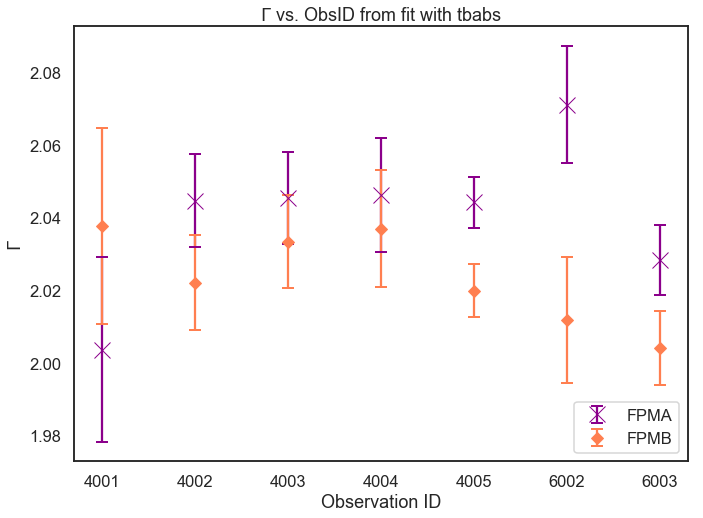

In [3]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

yerrs0=np.abs(df[['err_min_phoindex_tbabs', 'err_plus_phoindex_tbabs']][::2].T.values)
yerrs1=np.abs(df[['err_min_phoindex_tbabs', 'err_plus_phoindex_tbabs']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['phoindex_tbabs'][::2], yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['phoindex_tbabs'][1::2], yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

plt.xlabel('Observation ID')
plt.ylabel(r'$\Gamma$')
plt.title(r'$\Gamma$ vs. ObsID from fit with tbabs')

plt.legend(loc=4)
plt.show()



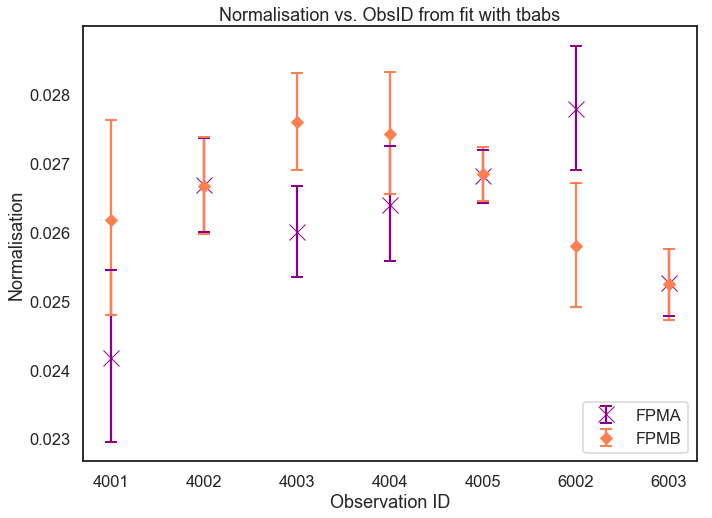

In [4]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

yerrs0=np.abs(df[['err_min_norm_tbabs', 'err_plus_norm_tbabs']][::2].T.values)
yerrs1=np.abs(df[['err_min_norm_tbabs', 'err_plus_norm_tbabs']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['norm_tbabs'][::2], yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['norm_tbabs'][1::2], yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

plt.xlabel('Observation ID')
plt.ylabel('Normalisation')
plt.title('Normalisation vs. ObsID from fit with tbabs')

plt.legend(loc=4)
plt.show()

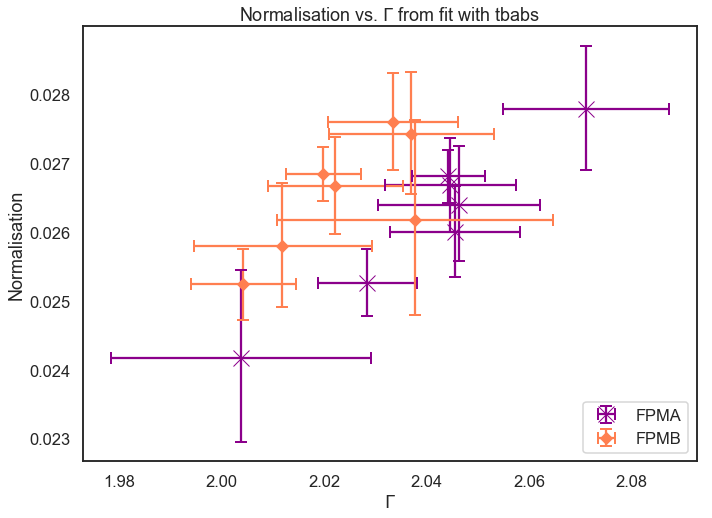

In [5]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

xerrs0=np.abs(df[['err_min_phoindex_tbabs', 'err_plus_phoindex_tbabs']][::2].T.values)
xerrs1=np.abs(df[['err_min_phoindex_tbabs', 'err_plus_phoindex_tbabs']][1::2].T.values)

yerrs0=np.abs(df[['err_min_norm_tbabs', 'err_plus_norm_tbabs']][::2].T.values)
yerrs1=np.abs(df[['err_min_norm_tbabs', 'err_plus_norm_tbabs']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['phoindex_tbabs'][::2], df['norm_tbabs'][::2], xerr=xerrs0, yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['phoindex_tbabs'][1::2], df['norm_tbabs'][1::2], xerr=xerrs1, yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

plt.ylabel('Normalisation')
plt.xlabel(r'$\Gamma$')
plt.title(r'Normalisation vs. $\Gamma$ from fit with tbabs')

plt.legend(loc=4)
plt.show()

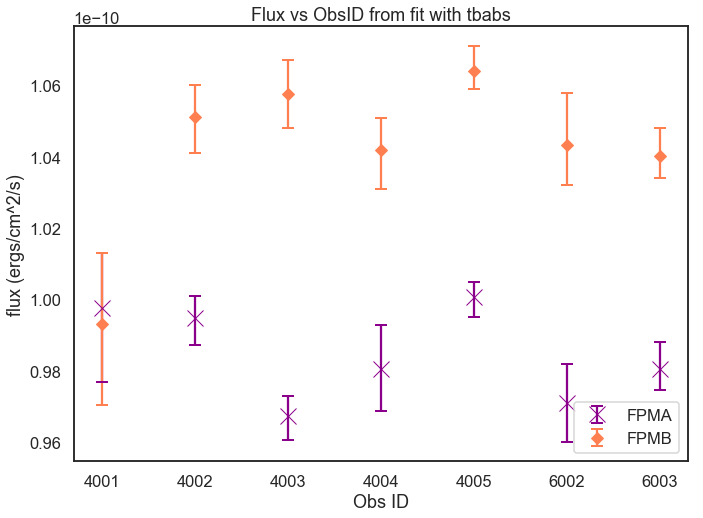

In [48]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

df['err_min_flux_tbabs']=df['flux_tbabs']-df['flux_min_tbabs']
df['err_plus_flux_tbabs']=df['flux_max_tbabs']-df['flux_tbabs']
yerrs0=np.abs(df[['err_min_flux_tbabs', 'err_plus_flux_tbabs']][::2].T.values)
yerrs1=np.abs(df[['err_min_flux_tbabs', 'err_plus_flux_tbabs']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['flux_tbabs'][::2], yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['flux_tbabs'][1::2], yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

plt.ylabel('flux (ergs/cm^2/s)')
plt.xlabel('Obs ID')
plt.title('Flux vs ObsID from fit with tbabs')

plt.legend(loc=4)
plt.show()

# Results for Component fitting tbabs * (pow+pow+pow+pow), using WILM abundances (n_H = 3.237)

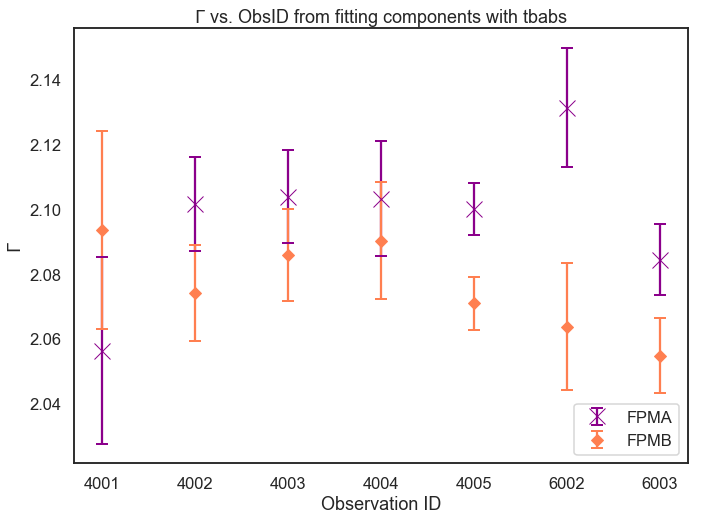

In [6]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

yerrs0=np.abs(df[['err_min_phoindex_comp', 'err_plus_phoindex_comp']][::2].T.values)
yerrs1=np.abs(df[['err_min_phoindex_comp', 'err_plus_phoindex_comp']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['phoindex_comp'][::2], yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['phoindex_comp'][1::2], yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

plt.xlabel('Observation ID')
plt.ylabel(r'$\Gamma$')
plt.title(r'$\Gamma$ vs. ObsID from fitting components with tbabs')

plt.legend(loc=4)
plt.show()



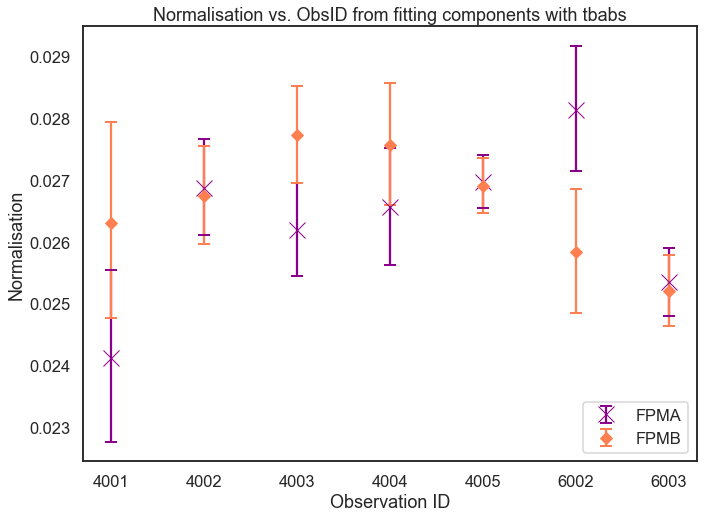

In [9]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

yerrs0=np.abs(df[['err_min_norm_comp', 'err_plus_norm_comp']][::2].T.values)
yerrs1=np.abs(df[['err_min_norm_comp', 'err_plus_norm_comp']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['norm_comp'][::2], yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['norm_comp'][1::2], yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

plt.xlabel('Observation ID')
plt.ylabel('Normalisation')
plt.title('Normalisation vs. ObsID from fitting components with tbabs')

plt.legend(loc=4)
plt.show()

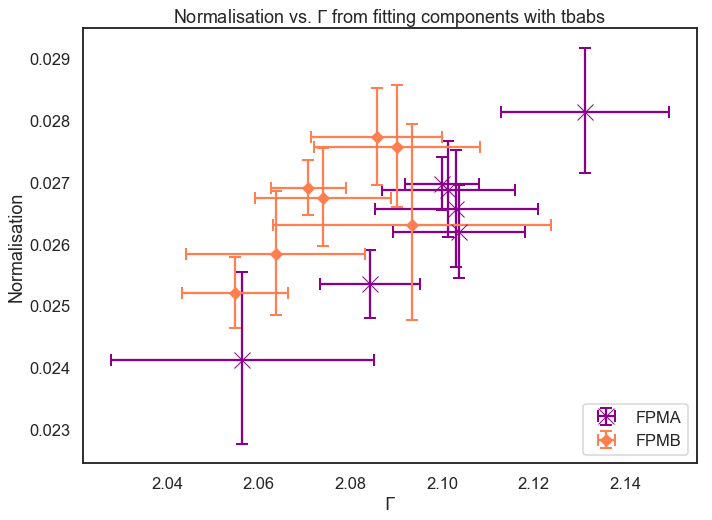

In [10]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

xerrs0=np.abs(df[['err_min_phoindex_comp', 'err_plus_phoindex_comp']][::2].T.values)
xerrs1=np.abs(df[['err_min_phoindex_comp', 'err_plus_phoindex_comp']][1::2].T.values)

yerrs0=np.abs(df[['err_min_norm_comp', 'err_plus_norm_comp']][::2].T.values)
yerrs1=np.abs(df[['err_min_norm_comp', 'err_plus_norm_comp']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['phoindex_comp'][::2], df['norm_comp'][::2], xerr=xerrs0, yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['phoindex_comp'][1::2], df['norm_comp'][1::2], xerr=xerrs1, yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

plt.ylabel('Normalisation')
plt.xlabel(r'$\Gamma$')
plt.title(r'Normalisation vs. $\Gamma$ from fitting components with tbabs')

plt.legend(loc=4)
plt.show()

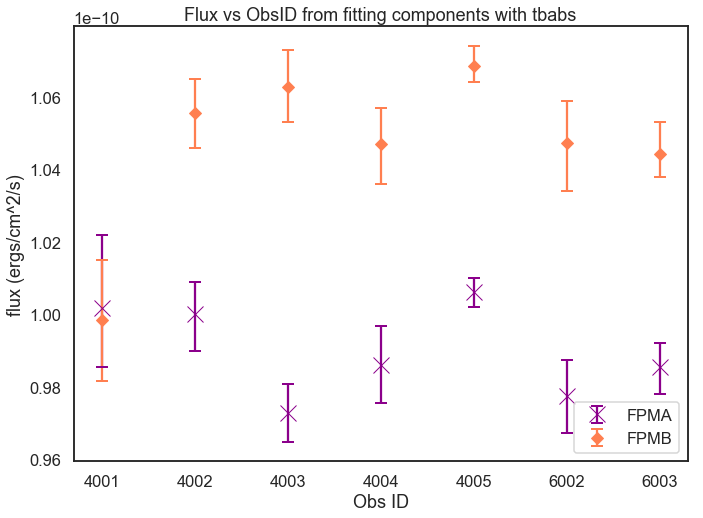

In [11]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

df['err_min_flux_comp']=df['flux_comp']-df['flux_min_comp']
df['err_plus_flux_comp']=df['flux_max_comp']-df['flux_comp']
yerrs0=np.abs(df[['err_min_flux_comp', 'err_plus_flux_comp']][::2].T.values)
yerrs1=np.abs(df[['err_min_flux_comp', 'err_plus_flux_comp']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['flux_comp'][::2], yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['flux_comp'][1::2], yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

plt.ylabel('flux (ergs/cm^2/s)')
plt.xlabel('Obs ID')
plt.title('Flux vs ObsID from fitting components with tbabs')

plt.legend(loc=4)
plt.show()

 # COMPARISONS

# Results for fitting tbabs * pow, using WILM abundances (n_H = 2.99) v. (n_H = 3.237)

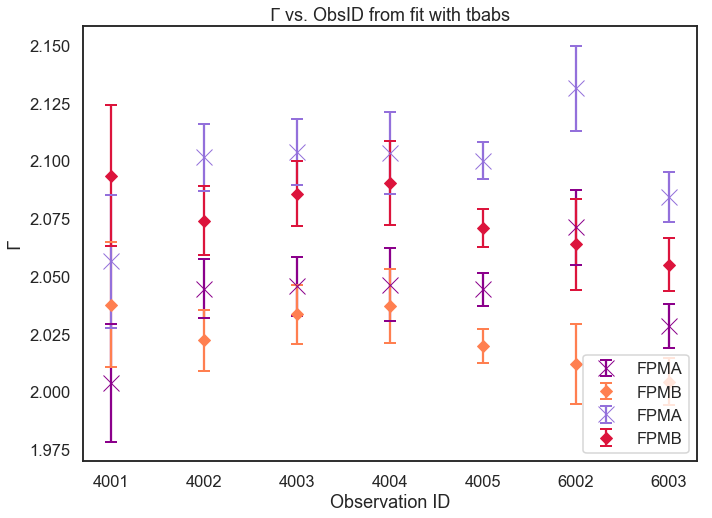

In [15]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

yerrs0=np.abs(df[['err_min_phoindex_tbabs', 'err_plus_phoindex_tbabs']][::2].T.values)
yerrs1=np.abs(df[['err_min_phoindex_tbabs', 'err_plus_phoindex_tbabs']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['phoindex_tbabs'][::2], yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['phoindex_tbabs'][1::2], yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

#Comp
yerrsc0=np.abs(df[['err_min_phoindex_comp', 'err_plus_phoindex_comp']][::2].T.values)
yerrsc1=np.abs(df[['err_min_phoindex_comp', 'err_plus_phoindex_comp']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['phoindex_comp'][::2], yerr=yerrsc0, fmt='x', markersize=16, color='mediumpurple', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['phoindex_comp'][1::2], yerr=yerrsc1, fmt='D', color='crimson', capsize=6, capthick=2, label ='FPMB')



plt.xlabel('Observation ID')
plt.ylabel(r'$\Gamma$')
plt.title(r'$\Gamma$ vs. ObsID from fit with tbabs')

plt.legend(loc=4)
plt.show()



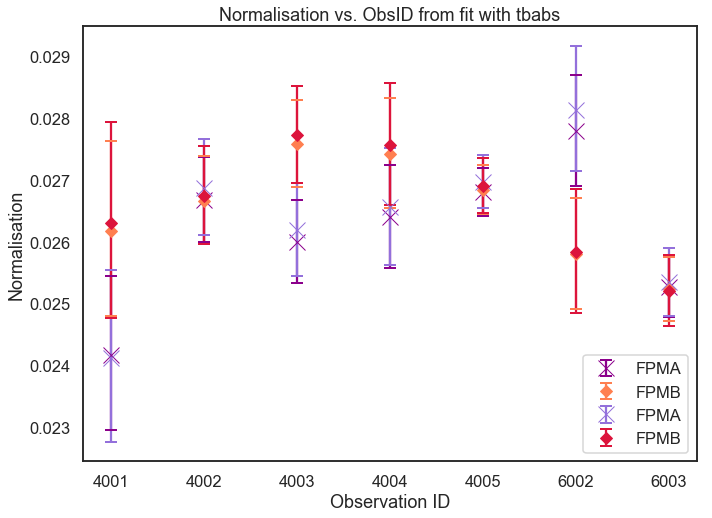

In [16]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

yerrs0=np.abs(df[['err_min_norm_tbabs', 'err_plus_norm_tbabs']][::2].T.values)
yerrs1=np.abs(df[['err_min_norm_tbabs', 'err_plus_norm_tbabs']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['norm_tbabs'][::2], yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['norm_tbabs'][1::2], yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

#Components:
yerrsc0=np.abs(df[['err_min_norm_comp', 'err_plus_norm_comp']][::2].T.values)
yerrsc1=np.abs(df[['err_min_norm_comp', 'err_plus_norm_comp']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['norm_comp'][::2], yerr=yerrsc0, fmt='x', markersize=16, color='mediumpurple', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['norm_comp'][1::2], yerr=yerrsc1, fmt='D', color='crimson', capsize=6, capthick=2, label ='FPMB')



plt.xlabel('Observation ID')
plt.ylabel('Normalisation')
plt.title('Normalisation vs. ObsID from fit with tbabs')

plt.legend(loc=4)
plt.show()

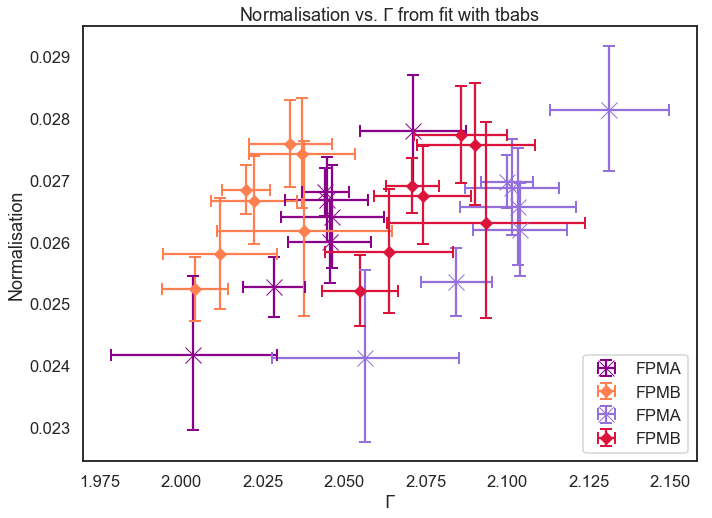

In [17]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

xerrs0=np.abs(df[['err_min_phoindex_tbabs', 'err_plus_phoindex_tbabs']][::2].T.values)
xerrs1=np.abs(df[['err_min_phoindex_tbabs', 'err_plus_phoindex_tbabs']][1::2].T.values)

yerrs0=np.abs(df[['err_min_norm_tbabs', 'err_plus_norm_tbabs']][::2].T.values)
yerrs1=np.abs(df[['err_min_norm_tbabs', 'err_plus_norm_tbabs']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['phoindex_tbabs'][::2], df['norm_tbabs'][::2], xerr=xerrs0, yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['phoindex_tbabs'][1::2], df['norm_tbabs'][1::2], xerr=xerrs1, yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

#components:
xerrsc0=np.abs(df[['err_min_phoindex_comp', 'err_plus_phoindex_comp']][::2].T.values)
xerrsc1=np.abs(df[['err_min_phoindex_comp', 'err_plus_phoindex_comp']][1::2].T.values)

yerrsc0=np.abs(df[['err_min_norm_comp', 'err_plus_norm_comp']][::2].T.values)
yerrsc1=np.abs(df[['err_min_norm_comp', 'err_plus_norm_comp']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['phoindex_comp'][::2], df['norm_comp'][::2], xerr=xerrsc0, yerr=yerrsc0, fmt='x', markersize=16, color='mediumpurple', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['phoindex_comp'][1::2], df['norm_comp'][1::2], xerr=xerrsc1, yerr=yerrsc1, fmt='D', color='crimson', capsize=6, capthick=2, label ='FPMB')



plt.ylabel('Normalisation')
plt.xlabel(r'$\Gamma$')
plt.title(r'Normalisation vs. $\Gamma$ from fit with tbabs')

plt.legend(loc=4)
plt.show()

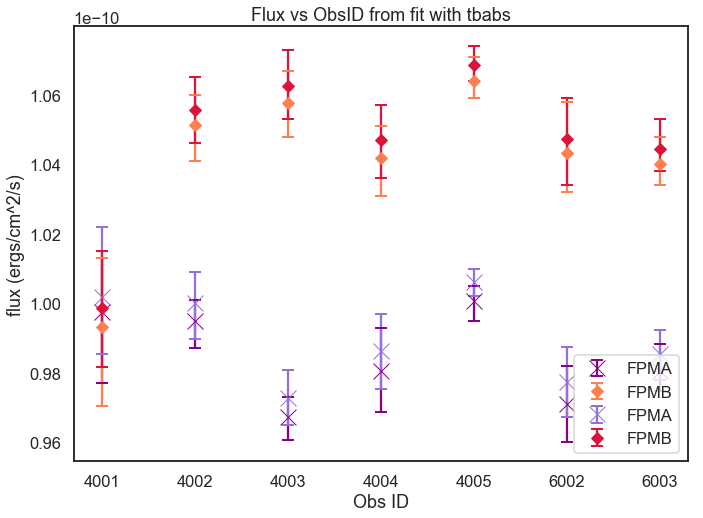

In [18]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

df['err_min_flux_tbabs']=df['flux_tbabs']-df['flux_min_tbabs']
df['err_plus_flux_tbabs']=df['flux_max_tbabs']-df['flux_tbabs']
yerrs0=np.abs(df[['err_min_flux_tbabs', 'err_plus_flux_tbabs']][::2].T.values)
yerrs1=np.abs(df[['err_min_flux_tbabs', 'err_plus_flux_tbabs']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['flux_tbabs'][::2], yerr=yerrs0, fmt='x', markersize=16, color='darkmagenta', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['flux_tbabs'][1::2], yerr=yerrs1, fmt='D', color='coral', capsize=6, capthick=2, label ='FPMB')

#components
df['err_min_flux_comp']=df['flux_comp']-df['flux_min_comp']
df['err_plus_flux_comp']=df['flux_max_comp']-df['flux_comp']
yerrsc0=np.abs(df[['err_min_flux_comp', 'err_plus_flux_comp']][::2].T.values)
yerrsc1=np.abs(df[['err_min_flux_comp', 'err_plus_flux_comp']][1::2].T.values)

# Even entries are the FPMA observations (count starts at 0), uneven entries are the FPMB observations
plt.errorbar(df['Obs'][::2], df['flux_comp'][::2], yerr=yerrsc0, fmt='x', markersize=16, color='mediumpurple', capsize=6, capthick=2, label ='FPMA')
plt.errorbar(df['Obs'][1::2], df['flux_comp'][1::2], yerr=yerrsc1, fmt='D', color='crimson', capsize=6, capthick=2, label ='FPMB')



plt.ylabel('flux (ergs/cm^2/s)')
plt.xlabel('Obs ID')
plt.title('Flux vs ObsID from fit with tbabs')

plt.legend(loc=4)
plt.show()

# Notes on code used in notebook

 - ### Obtaining even or uneven values from list: 
 list[start:end:step]<br>
Example: l = range(10) l[::2] # even - start at the beginning at take every second item [0, 2, 4, 6, 8] l[1::2] # odd - start at second item and take every second item [1, 3, 5, 7, 9]

 - ### Take the values from the pandas dataframe to use in a list form
 It is vital to specify that you need the values. <br>
 Example:  print np.abs(df[['err_min_phoindex_phabs', 'err_plus_phoindex_phabs']].T.values)
 
 - ### Panda's magic:
-  Set entry type to string, add df['new']=df['old'].astype(str). <br>
Ex: df['Obs']=df['Obs'].astype(str) # Needed, because otherwise in plot it will sort on number
-  Specify the indexer as one of the input columns using *index_col='Column_of_choice'* <br>
Ex.: df = pd.read_csv('data/nustar_fit_params.csv', delimiter=';')#,index_col='Obs_ID')